In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    fromHB5Table1,
    readHEPDataCsv,
    read_csv_from_web,
)
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# CMS 13TeV

## `bbA > tautau` [1903.10228](https://arxiv.org/abs/1903.10228)

They don't say anything about it, so we assume that the search has no actual CP sensitivity and they just use the A as signal model for simplicity.

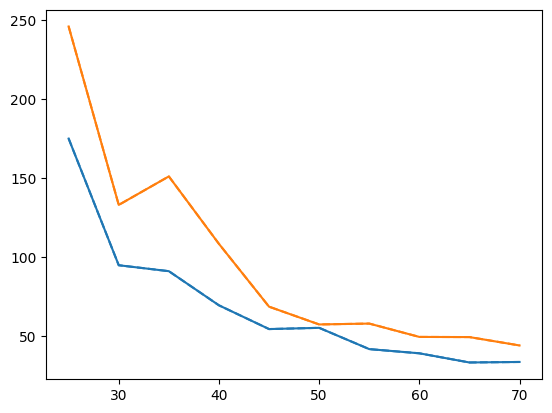

Looks good. Saving this to bbH_LHC13_CMS_36.json


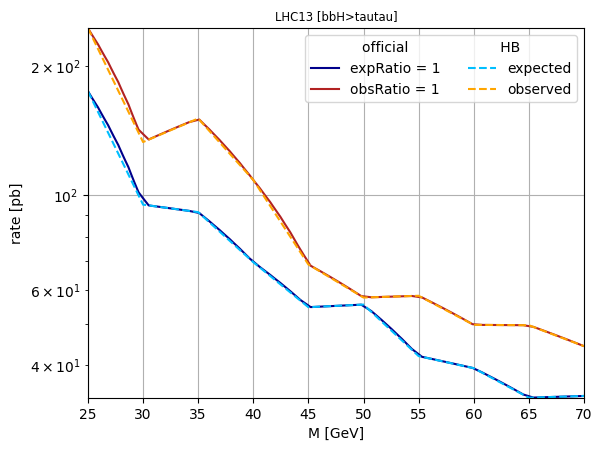

In [2]:
dfExp = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1726509/Exclusion%20limits%20on%20bbA%2C%20combined/1/csv",
    comment="#",
    skiprows=24,
    skipfooter=50 - 35,
    engine="python",
    names=["m", "exp", "unc+", "unc-"],
)

df = read_csv_from_web(
    "https://www.hepdata.net/download/table/ins1726509/Exclusion%20limits%20on%20bbA%2C%20combined/1/csv",
    comment="#",
    skiprows=10,
    skipfooter=50 - 21,
    engine="python",
    names=["m", "obs"],
)
assert np.allclose(df.m, dfExp.m)
df["exp"] = dfExp.exp

process = {"channels": [["bbH", "tautau"]]}
limitFile = implementChannelLimit(
    "1726509",
    process,
    "https://doi.org/10.17182/hepdata.88348.v1/t4",
    df,
    massResolution=resolution.tautau["default"], # fits the 15% quoted on p6
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


# CMS 8TeV LHC

## `VH>tautau` run 1 SM-Higgs search [CMS-PAS-HIG-12-051](http://cds.cern.ch/record/1494572)

No arxiv eprint found.
Multiple different luminosity values: [5.0, 12.0] using 5.0 unless you set it manually


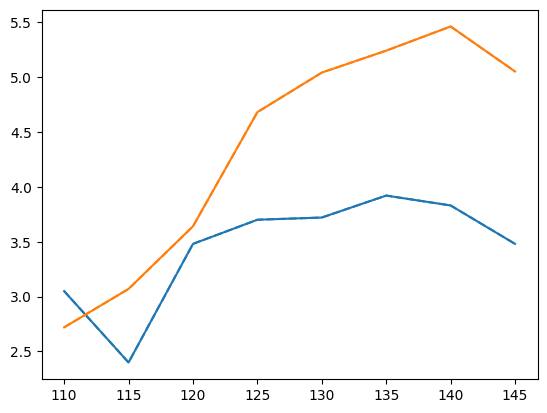

Looks good. Saving this to HV_LHC8_CMS_17.json
using effective coupling input for SM-normalized limit


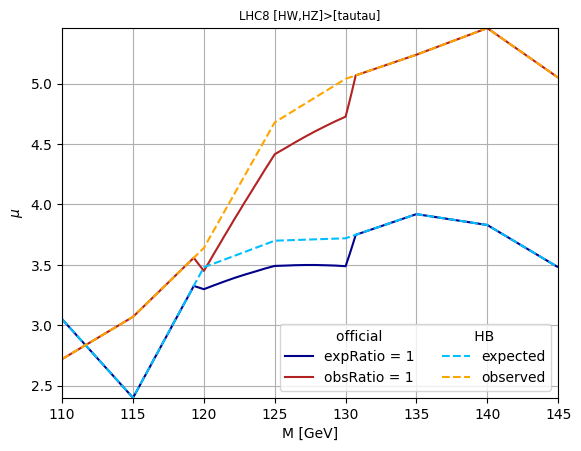

In [3]:
df = fromHB5Table1("12051_CMS_VH_Vtautau_17fb-1", "CMS")
limitFile = implementChannelLimit(
    1230265,
    {"channels": [["HZ", "tautau"], ["HW", "tautau"]]},
    "Fig. 4 (left)",
    df,
    luminosity=5 + 12,
    massResolution=resolution.tautau["default"],
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `bbH > tautau` [1511.03610](https://arxiv.org/abs/1511.03610)


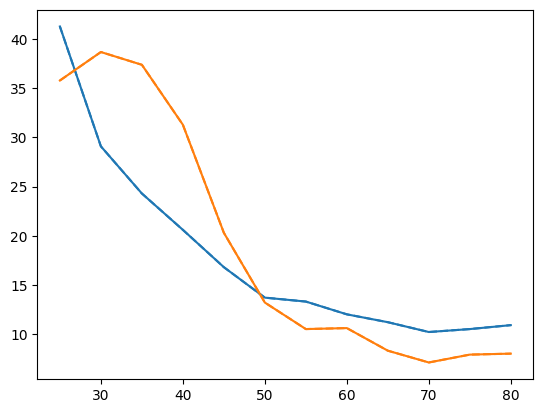

Looks good. Saving this to bbH_LHC8_CMS_20.json


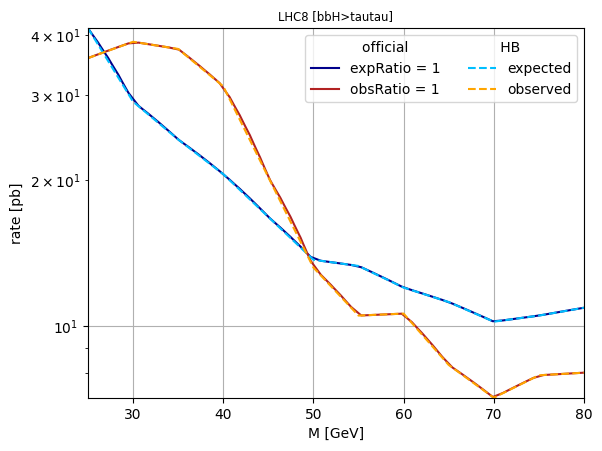

In [4]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1403990/Table%201/1/csv", skip=1
)
dfExp = dfs[2]
df = dfs[5].rename(columns={"mA [GEV]": "m", "95% CL upper limit on sigma [PB]": "obs"})
df["exp"] = dfExp["95% CL upper limit on sigma [PB]"]

limitFile = implementChannelLimit(
    "1511.03610",
    {"channels": [["bbH", "tautau"]]},
    "https://doi.org/10.17182/hepdata.73991",
    df,
    massResolution=resolution.tautau["default"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
